In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


sys.path.append(os.path.abspath('..'))

from src.data_processing import build_feature_pipeline

raw_data_path = './data/data.csv'
df = pd.read_csv(raw_data_path)

print("Raw Data Shape:", df.shape)
df.head()


Raw Data Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [49]:
import sys, os
sys.path.append(os.path.abspath('..'))

import importlib
import src.data_processing
importlib.reload(src.data_processing)

from src.data_processing import build_feature_pipeline


In [15]:
numerical_cols = ['Amount', 'Value']
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy']

In [16]:
pipeline = build_feature_pipeline(numerical_cols, categorical_cols)

df_processed = pipeline.fit_transform(df)

ohe_cols = pipeline.named_steps['preprocessing'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
df_processed = pd.DataFrame(df_processed, columns=numerical_cols + list(ohe_cols))

print("Processed Data Shape:", df_processed.shape)
df_processed.head()

Processed Data Shape: (95662, 27)


,Amount,Value,CurrencyCode_UGX,CountryCode_256,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,-0.046371,-0.072291,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.054643,-0.080251,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.050426,-0.076352,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.107717,0.096648,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.059704,-0.075183,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
import sklearn
print(sklearn.__version__)


1.6.1



Missing Values:
 Series([], dtype: int64)


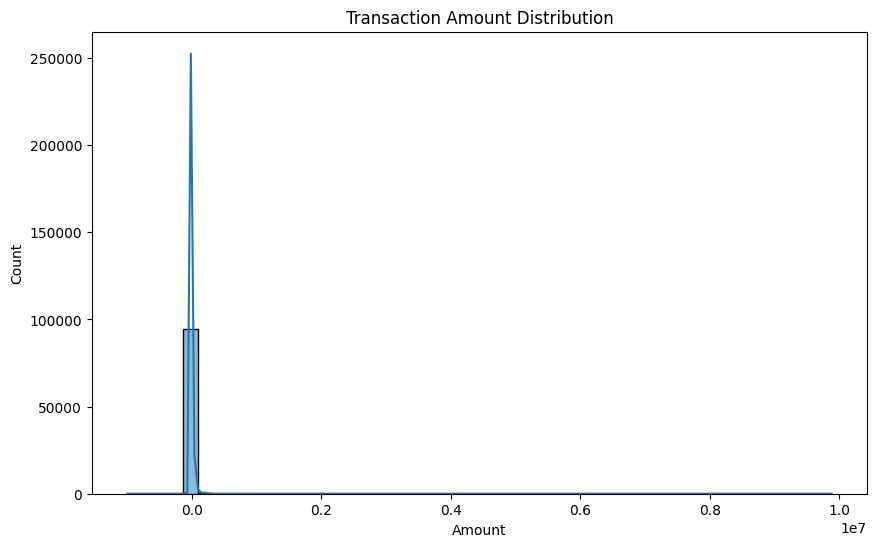

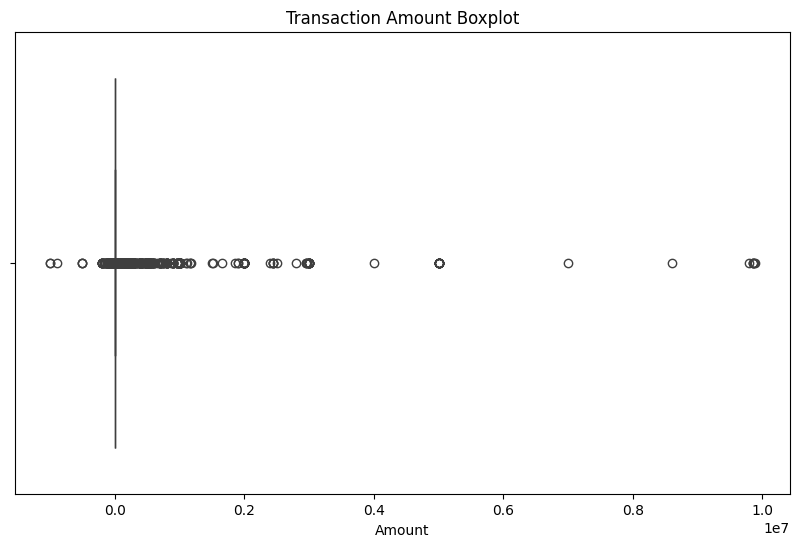

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Amount'])
plt.title('Transaction Amount Boxplot')
plt.show()